# MNIST Digit Classification
Build and train a neural network classifier on handwritten digit images

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

## Load and preprocess data

In [2]:
# Load MNIST dataset from scikit-learn (10k samples for faster training)
print('Loading MNIST dataset...')
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X, y = np.array(mnist.data), np.array(mnist.target, dtype=int)

# Use subset for faster training and testing
subset_size = 10000
X = X[:subset_size].astype(np.float32) / 255.0  # Normalise to [0,1]
y = y[:subset_size]

# Split into training and test sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')
print(f'Pixel value range: [{X_train.min():.2f}, {X_train.max():.2f}]')

Loading MNIST dataset...
Training data shape: (7000, 784)
Test data shape: (3000, 784)
Pixel value range: [0.00, 1.00]


## Train classifier

In [3]:
# Create and train MLP classifier with two hidden layers
classifier = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    max_iter=20,
    random_state=42,
    verbose=1
)

print('Training classifier...')
classifier.fit(X_train, y_train)
print('Training complete')

Training classifier...
Iteration 1, loss = 1.19235463
Iteration 2, loss = 0.38951400
Iteration 3, loss = 0.28136920
Iteration 4, loss = 0.22269691
Iteration 5, loss = 0.19073561
Iteration 6, loss = 0.16047183
Iteration 7, loss = 0.13524833
Iteration 8, loss = 0.11448343
Iteration 9, loss = 0.10061051
Iteration 10, loss = 0.08948196
Iteration 11, loss = 0.07464855
Iteration 12, loss = 0.06406408
Iteration 13, loss = 0.05608874
Iteration 14, loss = 0.04469059
Iteration 15, loss = 0.03976872
Iteration 16, loss = 0.03271724
Iteration 17, loss = 0.02799591
Iteration 18, loss = 0.02423057
Iteration 19, loss = 0.02021208
Iteration 20, loss = 0.01696479
Training complete


c:\Users\Scott\Documents\Coding\uni\masters\labs\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


## Evaluate performance

In [4]:
# Make predictions on both sets
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training accuracy: {train_accuracy:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')

Training accuracy: 0.9993
Test accuracy: 0.9460


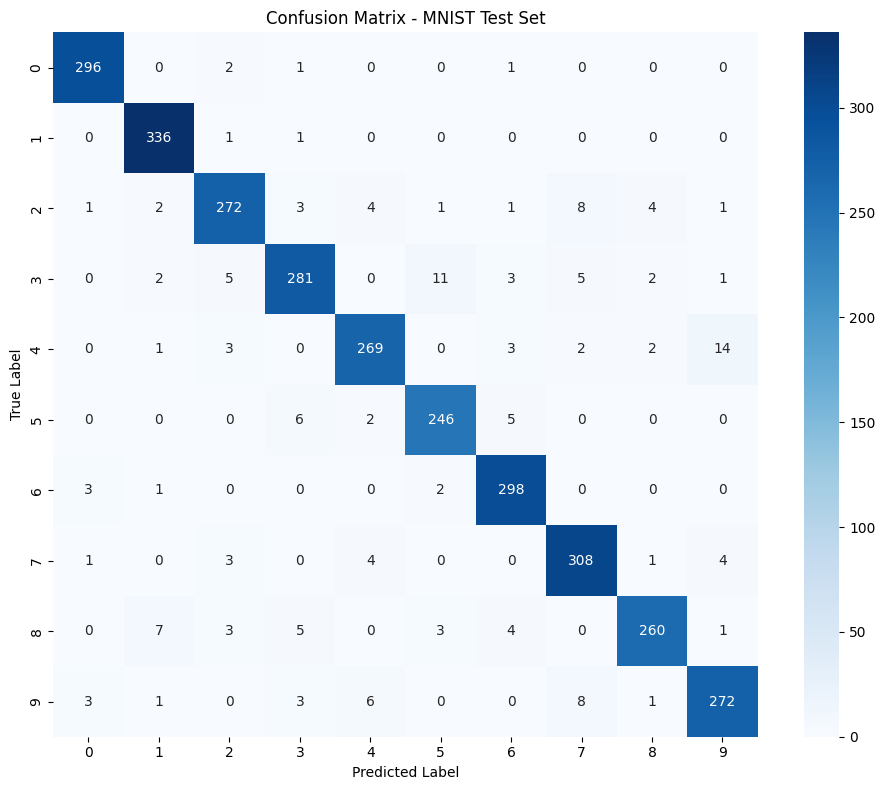

In [5]:
# Display confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix - MNIST Test Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [6]:
# Classification report
print(classification_report(y_test, y_test_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9737    0.9867    0.9801       300
           1     0.9600    0.9941    0.9767       338
           2     0.9412    0.9158    0.9283       297
           3     0.9367    0.9065    0.9213       310
           4     0.9439    0.9150    0.9292       294
           5     0.9354    0.9498    0.9425       259
           6     0.9460    0.9803    0.9628       304
           7     0.9305    0.9595    0.9448       321
           8     0.9630    0.9187    0.9403       283
           9     0.9283    0.9252    0.9267       294

    accuracy                         0.9460      3000
   macro avg     0.9459    0.9451    0.9453      3000
weighted avg     0.9460    0.9460    0.9458      3000



## Visualise sample predictions

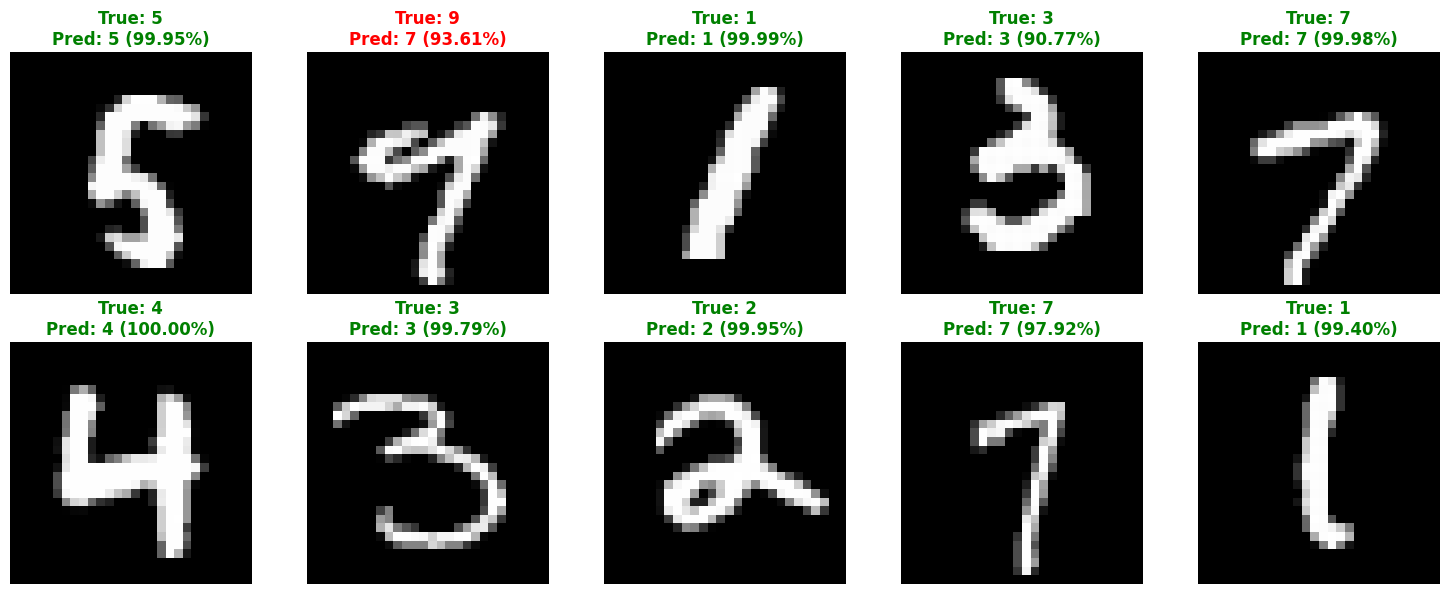

In [7]:
# Get prediction probabilities
y_test_proba = classifier.predict_proba(X_test)

# Visualise 10 random test samples with predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

# Select 10 random indices
indices = np.random.choice(len(X_test), 10, replace=False)

for idx, ax_idx in enumerate(indices):
    # Reshape pixel data back to 28x28 image
    image = X_test[ax_idx].reshape(28, 28)
    
    # Plot image
    axes[idx].imshow(image, cmap='gray')
    
    # Get predicted and true labels
    true_label = y_test[ax_idx]
    pred_label = y_test_pred[ax_idx]
    confidence = y_test_proba[ax_idx][pred_label]
    
    # Colour title based on correctness
    colour = 'green' if true_label == pred_label else 'red'
    axes[idx].set_title(f'True: {int(true_label)}\nPred: {int(pred_label)} ({confidence:.2%})',
                       color=colour, fontweight='bold')
    axes[idx].axis('off')

plt.tight_layout()
plt.show()